## A Simple Artificial Neural Network from Scratch with PyTorch

In my opinion, understanding artificial neural networks (ANNs) is pivotal for business analytics students to grasp the fundamentals of large language models and AI systems. Neural networks, which are computational models inspired by biological neural networks, form the backbone of these technologies. <BR>

Understanding how neural networks learn by adjusting connection weights, interpreting their outputs based on neuron interactions, fine-tuning performance, recognizing limitations like data needs and biases, and staying up-to-date with advancements are crucial reasons to study them. This knowledge allows students to use AI tools properly, make informed choices, ensure responsible AI use, and keep pace with the rapidly evolving technology.<BR>

All large language models are built using deep neural network architectures, typically transformer-based models with millions or billions of weights that get tuned on massive text datasets. The core principles of interconnected neuron layers, weight updates, and flexible model architectures from neural networks are applied at a grand scale to language tasks. Fundamentally, these large language models are a scaled-up application of neural network methods to the text domain.

In this tutorial we will implement a simple neural network from scratch using PyTorch. The idea of the tutorial is to teach you the basics of PyTorch and how it can be used to implement a neural network from scratch. I will go over some of the basic functionalities and concepts available in PyTorch that will allow you to build your own neural networks. 

This tutorial assumes you have prior knowledge of how a neural network works (maybe just from a YouTube video?). Even if you are not so sure, you will be okay. 

This tutorial was adapted from Elvis's post here: https://medium.com/dair-ai/a-simple-neural-network-from-scratch-with-pytorch-and-google-colab-c7f3830618e0


The `torch` module provides all the necessary **tensor** operators you will need to implement your first neural network from scratch in PyTorch. That's right! In PyTorch everything is a Tensor, so this is the first thing you will need to get used to.

In [1]:
# The torch module provides all the necessary tensor operators you will need to implement your first neural network from scratch.
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
# Display info about the Pytorch package
%pip show torch

Name: torch
Version: 2.0.0.post101
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /opt/conda/lib/python3.10/site-packages
Requires: filelock, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, autogluon.multimodal, autogluon.timeseries, fastai, pytorch-lightning, pytorch-metric-learning, timm, torchmetrics, torchvision
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Tensors are just multi-dimensional array or matrix of numbers
# 0D tensor (scaler)
print('0D tensor:', torch.tensor([5]))
# Print 1D tensor
print('1D tensor:', torch.tensor([1, 2, 3, 4, 5]))
# Print a 3 rows by 2 column (2D) tensor
print('2D tensor:\n', torch.tensor([[1, 2], [3,4], [5,6]]))

0D tensor: tensor([5])
1D tensor: tensor([1, 2, 3, 4, 5])
2D tensor:
 tensor([[1, 2],
        [3, 4],
        [5, 6]])


## Create an ANN to predict a student's grade based on hours studied and hours slept
Data:<BR>
Let's start by creating some sample data using the `torch.tensor` command.  We define types in PyTorch using the `dtype=torch.xxx` command. We'll use floats.

`X(a,b)` represents the amount of hours studied and how much time students spent sleeping.<BR>
`y` represent grades (0-100).

In [4]:
# Data: hours [studied,slept]
X = torch.tensor(([2, 9], [1, 5], [3, 6]), dtype=torch.float) # 3 X 2 tensor
# labels: grade earned (0-100 scale)
y = torch.tensor(([92], [100], [89]), dtype=torch.float) # 3 X 1 tensor

In [5]:
# You can check the dimensions and size of the tensors
print("Info about 'X': dimensions:", X.dim(), "size:", X.size())
print("Info about 'y': dimensions:", y.dim(), "size:", y.size())

Info about 'X': dimensions: 2 size: torch.Size([3, 2])
Info about 'y': dimensions: 2 size: torch.Size([3, 1])


## Scaling

As you likely know, scaling both the inputs and outputs can really help the performance of models. Below we are simply normalizing (scaling the data into (0-1) scale) the sample data. Notice that the `max` function returns both a tensor and the corresponding indices. So we use `_` as a throw-away variable to capture the indices which we won't use here.Our data is now in a very nice format our neural network will appreciate later on. 

In [6]:
# scale units: Normalize or min-max-scaling: everything to [0,1] interval
X_max, _ = torch.max(X, 0) # Get the max of both hours studied and slept
print("Max Tensor from the data:", X_max)
X = torch.div(X, X_max) # Scale by dividing tensor by max values possible
print('Scaled X:', X)
y = y / 100  # max test score is 100
print('Scaled y:', y)

Max Tensor from the data: tensor([3., 9.])
Scaled X: tensor([[0.6667, 1.0000],
        [0.3333, 0.5556],
        [1.0000, 0.6667]])
Scaled y: tensor([[0.9200],
        [1.0000],
        [0.8900]])


## Model (Computation Graph)
Once the data has been prepared, all you need to do now is to define your model. At the end of the day we are constructing a computation graph, which is used to dictate how data should flow and what type of operations are performed on this information. 

For illustration purposes, we are building the following neural network or computation graph:

![alt text](images/fig1.jpg)

In [7]:
# Define a class with shape of the NN and its functions
class Neural_Network(nn.Module):
    def __init__(self, ):
        super(Neural_Network, self).__init__()
        # Define the shape of the model: 
        self.inputSize = 2 # Number of input layers
        self.outputSize = 1 # Number of output layers
        self.hiddenSize = 3 # Number of hidden layers
        
        # Initialize the weights with random numbers
        self.W1 = torch.randn(self.inputSize, self.hiddenSize) # 3 X 2 tensor
        self.W2 = torch.randn(self.hiddenSize, self.outputSize) # 3 X 1 tensor
    # Feed forward function
    def forward(self, X):
        self.z = torch.matmul(X, self.W1) # 3 X 3 ".dot" does not broadcast in PyTorch
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = torch.matmul(self.z2, self.W2)
        o = self.sigmoid(self.z3) # final activation function
        return o
    # Activation function        
    def sigmoid(self, s):
        return 1 / (1 + torch.exp(-s))
    # Derivative of the activation function
    def sigmoidPrime(self, s):
        # derivative of sigmoid
        return s * (1 - s)
    # Backward feed function
    def backward(self, X, y, o):
        self.o_error = y - o # error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # derivative of sig to error
        self.z2_error = torch.matmul(self.o_delta, torch.t(self.W2))
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)
        self.W1 += torch.matmul(torch.t(X), self.z2_delta)
        self.W2 += torch.matmul(torch.t(self.z2), self.o_delta)
    # Training function        
    def train(self, X, y):
        # forward + backward pass for training
        o = self.forward(X)
        self.backward(X, y, o)
    # Save the weights    
    def saveWeights(self, model):
        # we will use the PyTorch internal storage functions
        torch.save(model, "NN")
        # you can reload model with all the weights and so forth with:
        # torch.load("NN")

For the purpose of this tutorial, we are not going to be talking the details of ANN implementation. Mostly, I just want you to get a gist of what it takes to build a neural network from scratch using PyTorch. Let's break down the model which was declared via the class above. 

### Class Header
First, we defined our model via a class because that is the recommended way to build the computation graph. The class header contains the name of the class `Neural Network` and the parameter `nn.Module` which basically indicates that we are defining our own neural network. 

```python
class Neural_Network(nn.Module):
```

### Initialization
The next step is to define the initializations ( `def __init__(self,)`) that will be performed upon creating an instance of the customized neural network. You can declare the parameters of your model here, but typically, you would declare the structure of your network in this section -- the size of the hidden layers and so forth. Since we are building the neural network from scratch, we explicitly declared the size of the weights matrices: one that stores the parameters from the input to hidden layer; and one that stores the parameter from the hidden to output layer. Both weight matrices are initialized with values randomly chosen from a normal distribution via `torch.randn(...)`. Note that we are not using bias just to keep things as simple as possible.  

```python
def __init__(self, ):
    super(Neural_Network, self).__init__()
    # Define the shape of the model: 
    self.inputSize = 2
    self.outputSize = 1
    self.hiddenSize = 3

    # weights
    self.W1 = torch.randn(self.inputSize, self.hiddenSize) # 3 X 2 tensor
    self.W2 = torch.randn(self.hiddenSize, self.outputSize) # 3 X 1 tensor
```

### The Forward Function
The `forward` function is where all the magic happens (see below). This is where the data enters and is fed into the computation graph (i.e., the neural network structure we have built). Since we are building a simple neural network with one hidden layer, our forward function looks very simple:

```python
def forward(self, X):
    self.z = torch.matmul(X, self.W1) 
    self.z2 = self.sigmoid(self.z) # activation function
    self.z3 = torch.matmul(self.z2, self.W2)
    o = self.sigmoid(self.z3) # final activation function
    return o
```

The `forward` function above takes the input `X`and then performs a matrix multiplication (`torch.matmul(...)`) with the first weight matrix `self.W1`. Then the result is applied an activation function, `sigmoid`. The resulting matrix of the activation is then multiplied with the second weight matrix `self.W2`. Then another activation if performed, which renders the output of the neural network or computation graph. The process I described above is simply what's known as a `feedforward pass`. In order for the weights to optimize when training, we need a backpropagation algorithm. 

### The Backward Function
The `backward` function contains the backpropagation algorithm, where the goal is to essentially minimize the loss with respect to our weights. In other words, the weights need to be updated in such  a way that the loss decreases while the neural network is training (well, that is what we hope for). All this magic is possible with the gradient descent algorithm which is declared in the `backward` function. Take a minute or two to inspect what is happening in the code below:

```python
def backward(self, X, y, o):
    self.o_error = y - o # error in output
    self.o_delta = self.o_error * self.sigmoidPrime(o) 
    self.z2_error = torch.matmul(self.o_delta, torch.t(self.W2))
    self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)
    self.W1 += torch.matmul(torch.t(X), self.z2_delta)
    self.W2 += torch.matmul(torch.t(self.z2), self.o_delta)
```

Notice that we are performing a lot of matrix multiplications along with the transpose operations via the `torch.matmul(...)` and `torch.t(...)` operations, respectively. The rest is simply gradient descent -- there is nothing to it.

## Training
All that is left now is to train the neural network. First we create an instance of the computation graph we have just built:

```python
NN = Neural_Network()
```

Then we train the model for `1000` rounds. Notice that in PyTorch `NN(X)` automatically calls the `forward` function so there is no need to explicitly call `NN.forward(X)`. 

After we have obtained the predicted output for every round of training, we compute the loss, with the following code:

```python
torch.mean((y - NN(X))**2).detach().item()
```

The next step is to start the training (foward + backward) via `NN.train(X, y)`. After we have trained the neural network, we can store the model and output the predicted value of the single instance we declared in the beginning, `xPredicted`.  

Let's train!

#0 Loss: 0.11654549837112427
#999 Loss: 0.0018166033551096916


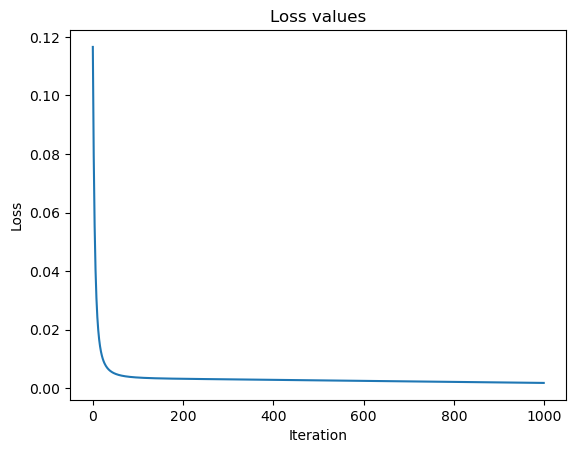

In [8]:
# Create an instance of the class we defined above
NN = Neural_Network()
# Train using a loop
loss_values = [] # keep track of loss function values each loop
for i in range(1000):  # trains the NN 1,000 times
    loss = torch.mean((y - NN(X))**2).detach().item() # Compute the mean sum squared loss value
    loss_values.append(loss)  # Store the loss value
    # Uncomment the next line if you want to see the loss function decrease as it learns
    #print("#" + str(i) + " Loss: " + str(loss))
    # Just print the first and last values of the loss 
    if i == 0 or i == 999:
        print ("#" + str(i) + " Loss: " + str(loss))
    NN.train(X, y)
# After training, plot the loss values as they improve
plt.plot(loss_values)
plt.title('Loss values')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()
# We've done the work of training, so let's save our weights.
NN.saveWeights(NN)

The loss decreases rapidly, but then slows. This means that the neural network has learned how to predict the grade based on the hours studied/slept. Don't lose the context of the overly simplified model and lack of data.

## Prediction
To predict a new student grade using our trained ANN, just feed a scaled tensor into the forward() method of the model.

In [9]:
# Define a predict funciton to take care of the details
#
def predict(t): # Accept a tensor
    scaled_t = torch.div(t, X_max) # Scale it the same as the training data
    prediction = NN.forward(scaled_t) # predict by calling the forward function from the trained NN
    return prediction.item() # Return the raw decimal value

In [10]:
# Nick is a serious student, he studies 3 hours and sleeps only 4 hours
Nick = predict(torch.tensor(([3,4]), dtype=torch.float))
print("Serious Nick's grade:", "{:.1%}".format(Nick))
#
# Ryan is naturally pretty smart, doesn't study much, but he sleeps well [.5,8]
Ryan = predict(torch.tensor(([.5,8]), dtype = torch.float))
print("Smart Ryan's grade:", "{:.1%}".format(Ryan))
#
# Darren is a poor student and serious partier [.1,.1]
Darren =  predict(torch.tensor(([.1,.1]), dtype=torch.float))
print("Dance Floor Darren's grade:", "{:.1%}".format(Darren))

Serious Nick's grade: 91.6%
Smart Ryan's grade: 94.7%
Dance Floor Darren's grade: 93.3%


 That's it. Congratulations! You have just learned how to create and train a aritifical neural network from scratch using PyTorch. Remember, ANNs are the core of LLMs and AI.

## References:
- [Elvis' Post](https://medium.com/dair-ai/a-simple-neural-network-from-scratch-with-pytorch-and-google-colab-c7f3830618e0)
- [PyTorch nn. Modules](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#pytorch-custom-nn-modules)
- [Build a Neural Network with Numpy](https://enlight.nyc/neural-network)
